In [238]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [239]:
import pandas as pd

# 학습/평가 데이터 로딩
df_total = pd.read_csv("train.csv")

In [240]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# df_total['1m'] = df_total['총생활인구수'].shift(24*30)
# df_total['7d'] = df_total['총생활인구수'].shift(24*7)
df_total['2m'] = df_total['총생활인구수'].shift(24*63)
df_total['4m'] = df_total['총생활인구수'].shift(24*119)
df_total['6m'] = df_total['총생활인구수'].shift(24*182)
df_total['8m'] = df_total['총생활인구수'].shift(24*245)
df_total['10m'] = df_total['총생활인구수'].shift(24*308)
df_total['12m'] = df_total['총생활인구수'].shift(24*364)

In [241]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total['기준일ID'] = pd.to_datetime(df_total['기준일ID'], format='%Y-%m-%d')

df_total['year'] = df_total['기준일ID'].dt.year
df_total['month'] = df_total['기준일ID'].dt.month
df_total['day'] = df_total['기준일ID'].dt.day

In [242]:
df_total = df_total.dropna()

In [243]:
df_total

,기준일ID,총생활인구수,1d,7d,요일,2m,4m,6m,8m,10m,12m,year,month,day
8736,2018-01-07,37429.6214,37603.8512,36572.2515,일,37322.9739,37182.7874,34467.5096,28944.4087,30402.7637,30716.3268,2018,1,7
8737,2018-01-07,37895.5583,38520.1926,37155.7261,일,37904.9873,37437.9074,34752.9398,29182.0409,30287.0074,30673.4813,2018,1,7
8738,2018-01-07,38173.4374,38606.2926,37300.9598,일,38267.1438,37513.9152,34868.6937,29403.8852,30663.7413,30535.9573,2018,1,7
8739,2018-01-07,38580.5771,39136.8900,37614.1715,일,38564.8576,39674.2493,35179.2638,29710.1249,30959.0083,30884.0372,2018,1,7
8740,2018-01-07,39230.2732,39733.1413,38228.9043,일,39333.3996,41257.5606,36025.5220,30451.9938,31595.8762,31353.9409,2018,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43339,2021-12-31,33060.4555,33928.2051,33980.5909,금,35337.4765,31717.4017,32191.7994,32736.0731,35700.3668,30474.4960,2021,12,31
43340,2021-12-31,32360.1898,33712.5348,33047.1323,금,34760.6755,31197.5537,31113.7687,31849.1902,34416.7456,29977.7639,2021,12,31
43341,2021-12-31,31417.3991,32144.4917,32033.9452,금,32517.1118,30549.6645,30191.1732,30921.0276,33378.5832,29959.6342,2021,12,31
43342,2021-12-31,30763.0563,32137.7017,31659.1453,금,33020.1828,30268.1244,30395.0947,30837.9635,32078.2106,29917.6078,2021,12,31


In [244]:
# df_total['1월'] = df_total[(df_total['year']==2021)]['총생활인구수'].shift(24*7)

In [245]:
datas = {'2m' : df_total['2m'],
         '4m' : df_total['4m'],
        '6m' : df_total['6m'],
        '8m' : df_total['8m'],
        '10m' : df_total['10m'],
        '12m' : df_total['12m']} 
train_x = pd.DataFrame(datas)
train_x = train_x.reset_index(drop=True)
train_x

,2m,4m,6m,8m,10m,12m
0,37322.9739,37182.7874,34467.5096,28944.4087,30402.7637,30716.3268
1,37904.9873,37437.9074,34752.9398,29182.0409,30287.0074,30673.4813
2,38267.1438,37513.9152,34868.6937,29403.8852,30663.7413,30535.9573
3,38564.8576,39674.2493,35179.2638,29710.1249,30959.0083,30884.0372
4,39333.3996,41257.5606,36025.5220,30451.9938,31595.8762,31353.9409
...,...,...,...,...,...,...
34603,35337.4765,31717.4017,32191.7994,32736.0731,35700.3668,30474.4960
34604,34760.6755,31197.5537,31113.7687,31849.1902,34416.7456,29977.7639
34605,32517.1118,30549.6645,30191.1732,30921.0276,33378.5832,29959.6342
34606,33020.1828,30268.1244,30395.0947,30837.9635,32078.2106,29917.6078


In [246]:
datas = {'총생활인구수' : df_total['총생활인구수']}
train_y = pd.DataFrame(datas)
train_y = train_y.reset_index(drop=True)
train_y

,총생활인구수
0,37429.6214
1,37895.5583
2,38173.4374
3,38580.5771
4,39230.2732
...,...
34603,33060.4555
34604,32360.1898
34605,31417.3991
34606,30763.0563


In [247]:
datas = {
    '2m' : df_total['2m'],
         '4m' : df_total['4m'],
        '6m' : df_total['6m'],
        '8m' : df_total['8m'],
        '10m' : df_total['10m'],
        '12m' : df_total['12m']} 
test_x = pd.DataFrame(datas)
test_x = test_x.reset_index(drop=True)
test_x=test_x[-1512:-96]
test_x

,2m,4m,6m,8m,10m,12m
33096,31313.0689,30576.8001,31433.4696,31894.8129,31649.1248,32773.9771
33097,31562.3610,31001.4727,31661.3958,31965.7292,31742.9045,32881.6996
33098,31751.7337,31308.3810,32183.1083,32633.0971,32036.1484,33184.7103
33099,31914.0767,31488.0506,32388.0806,32718.5351,32032.5955,33440.8351
33100,32672.3831,32582.9694,33439.0460,33543.6281,32823.1954,34048.4092
...,...,...,...,...,...,...
34507,34156.0344,31194.7227,31554.9585,31737.7286,33413.1123,32166.1684
34508,32747.7198,31146.6395,30270.3744,31377.8939,33386.9857,32157.8474
34509,32231.6518,30851.8527,29827.9643,31221.3619,32632.1940,31432.7866
34510,32265.9200,30917.2963,30858.9305,30545.2629,32026.6991,31016.1698


In [248]:
test_y=df2022['총생활인구수'][:1416]
test_y

0       30509.7386
1       30759.5067
2       31048.8787
3       31076.1092
4       31714.9309
           ...    
1411    32453.4947
1412    32073.9265
1413    31374.2576
1414    31127.4353
1415    31550.2525
Name: 총생활인구수, Length: 1416, dtype: float64

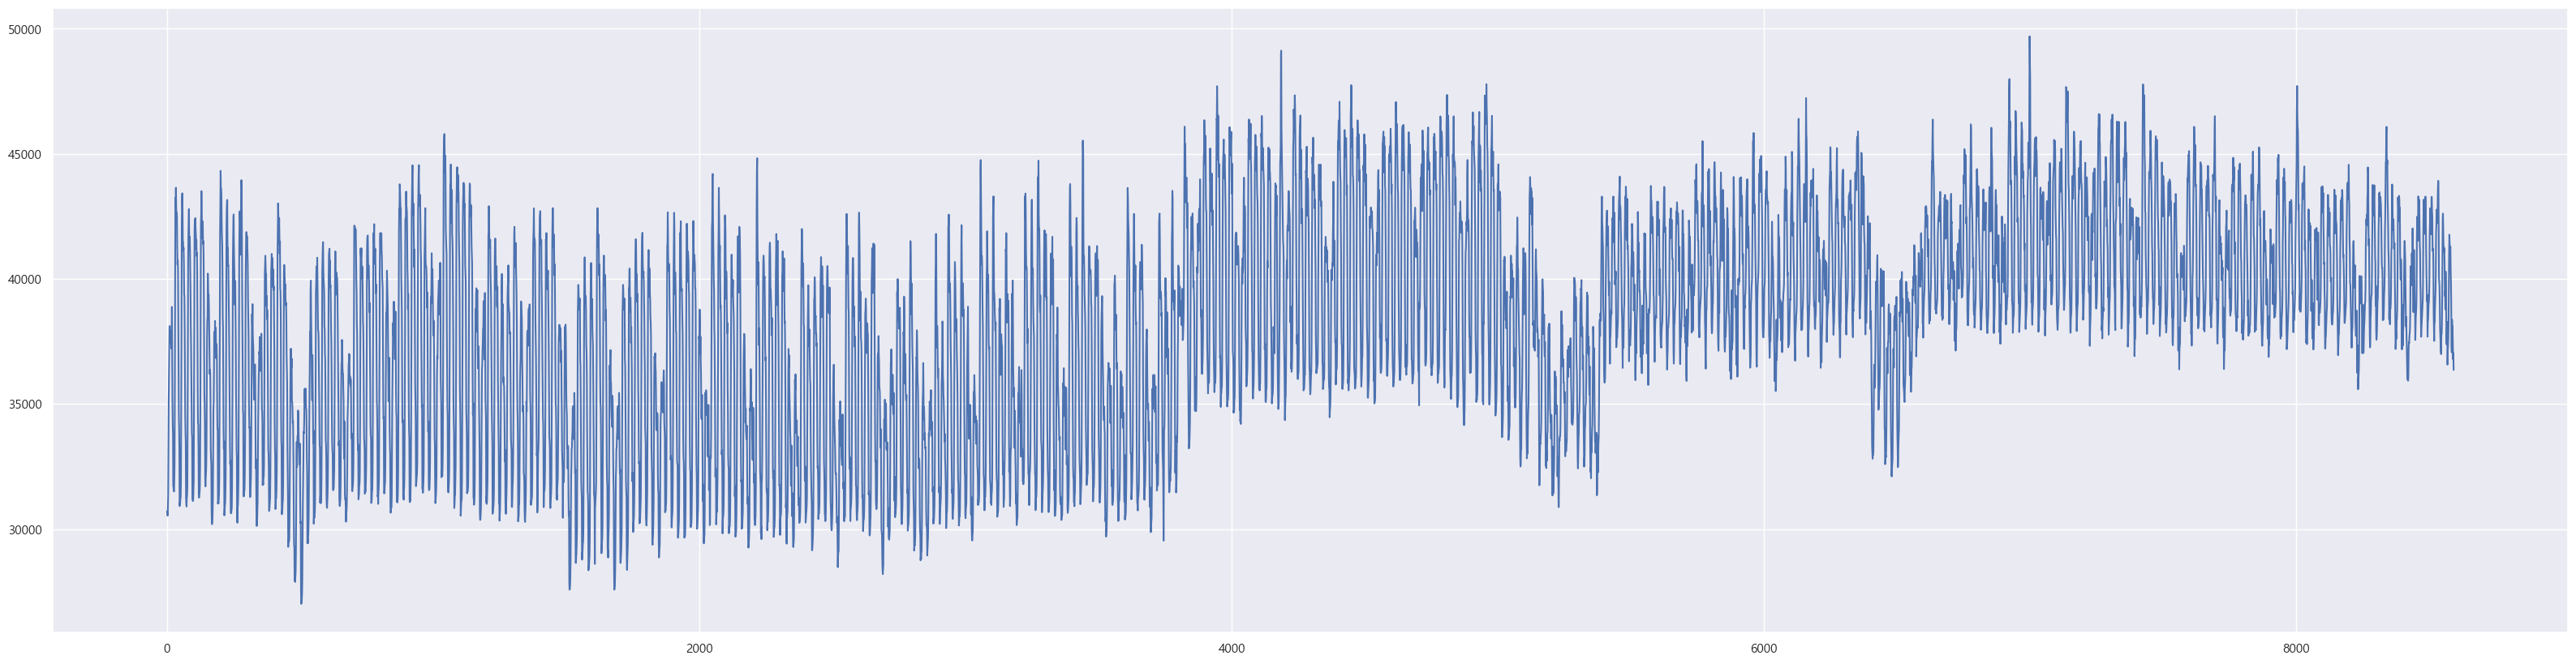

In [228]:
plt.figure(figsize=(40,10))
plt.plot(df_total[(df_total['year']==2017)]['총생활인구수'])

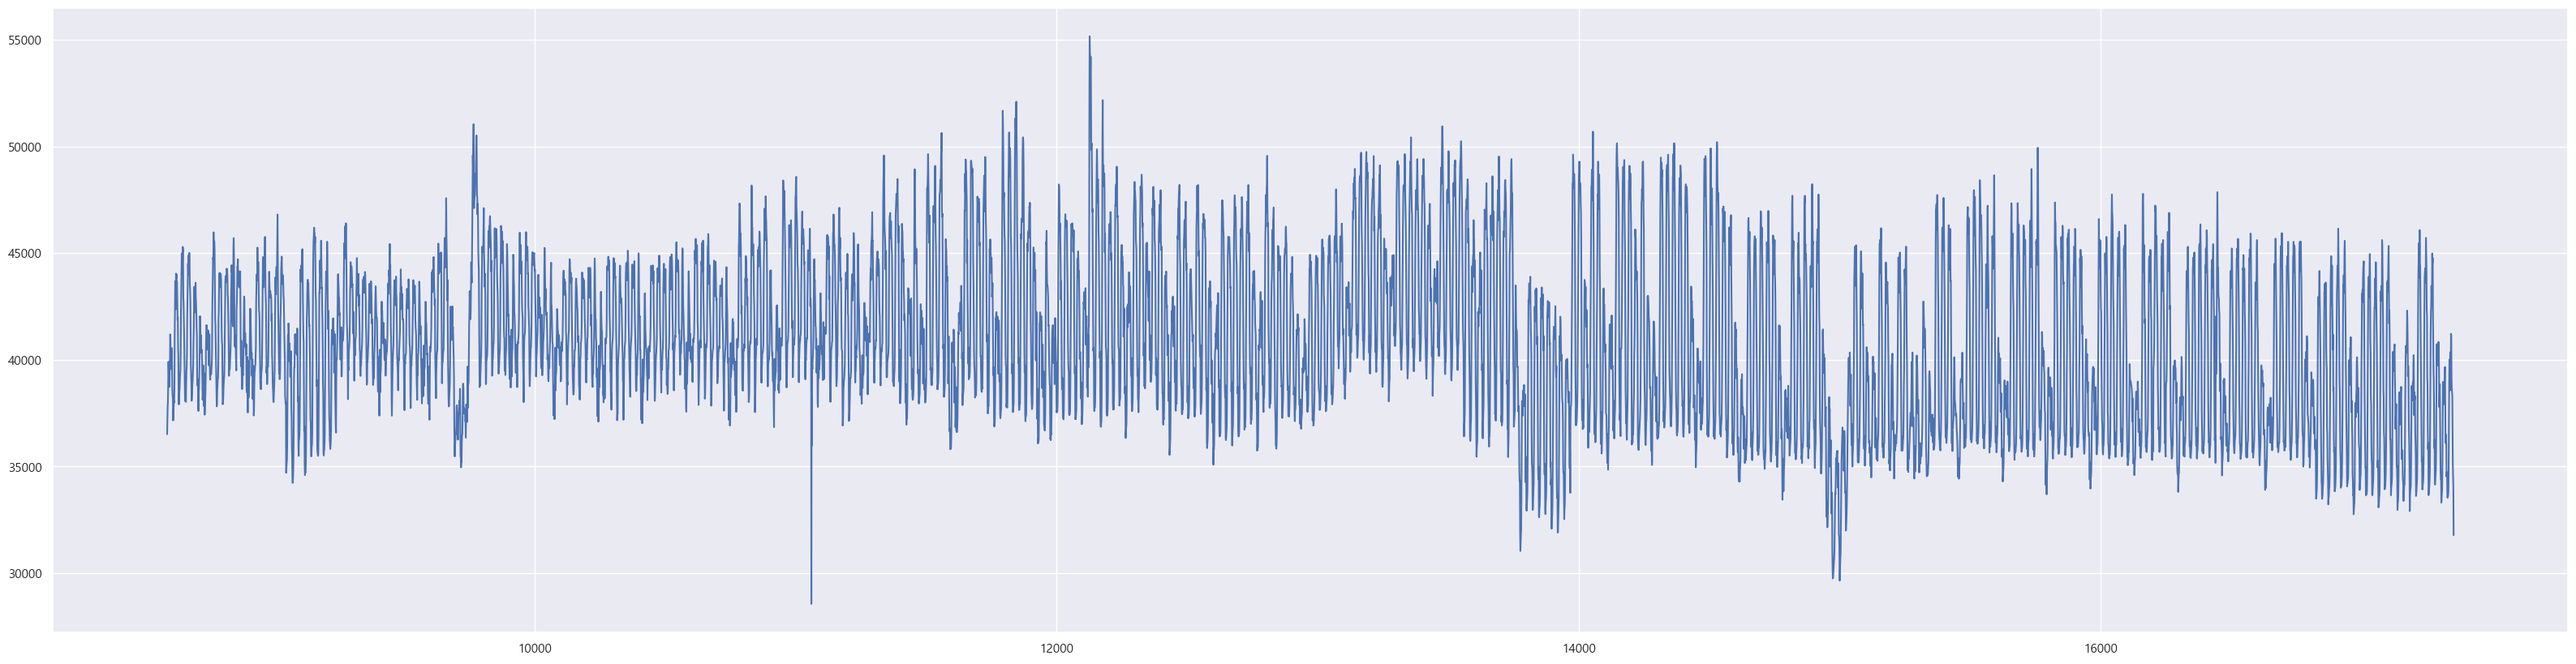

In [230]:
plt.figure(figsize=(40,10))
plt.plot(df_total[(df_total['year']==2018)]['총생활인구수'])

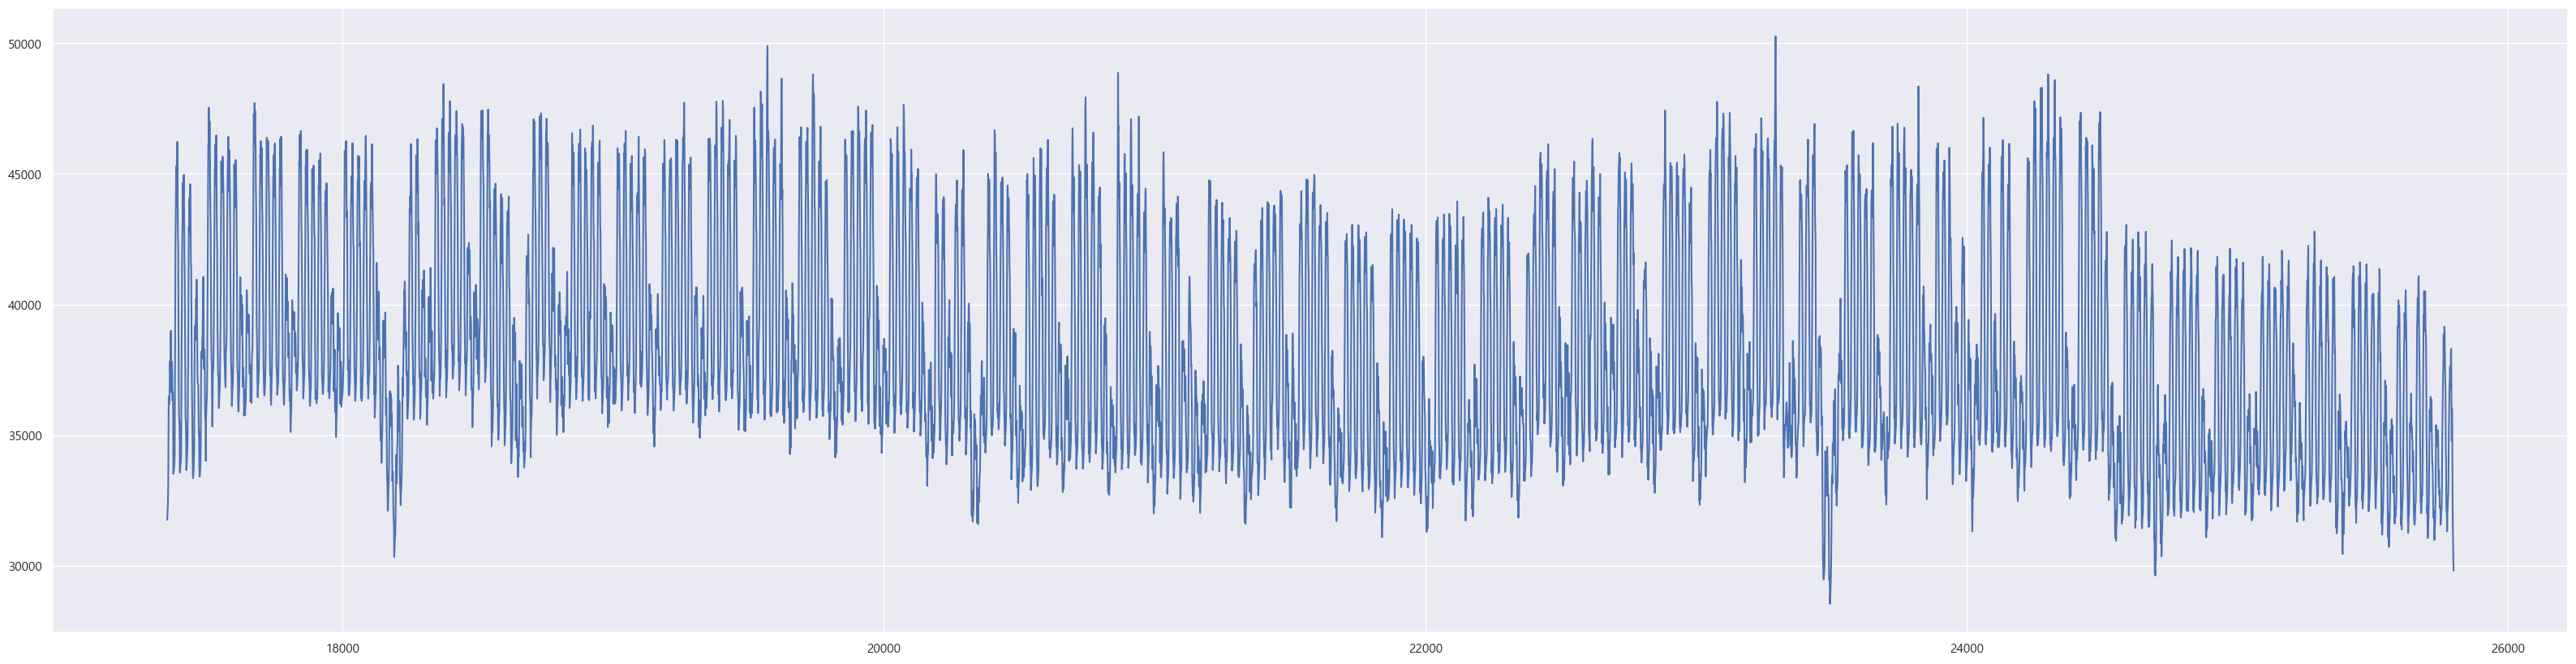

In [231]:
plt.figure(figsize=(40,10))
plt.plot(df_total[(df_total['year']==2019)]['총생활인구수'])

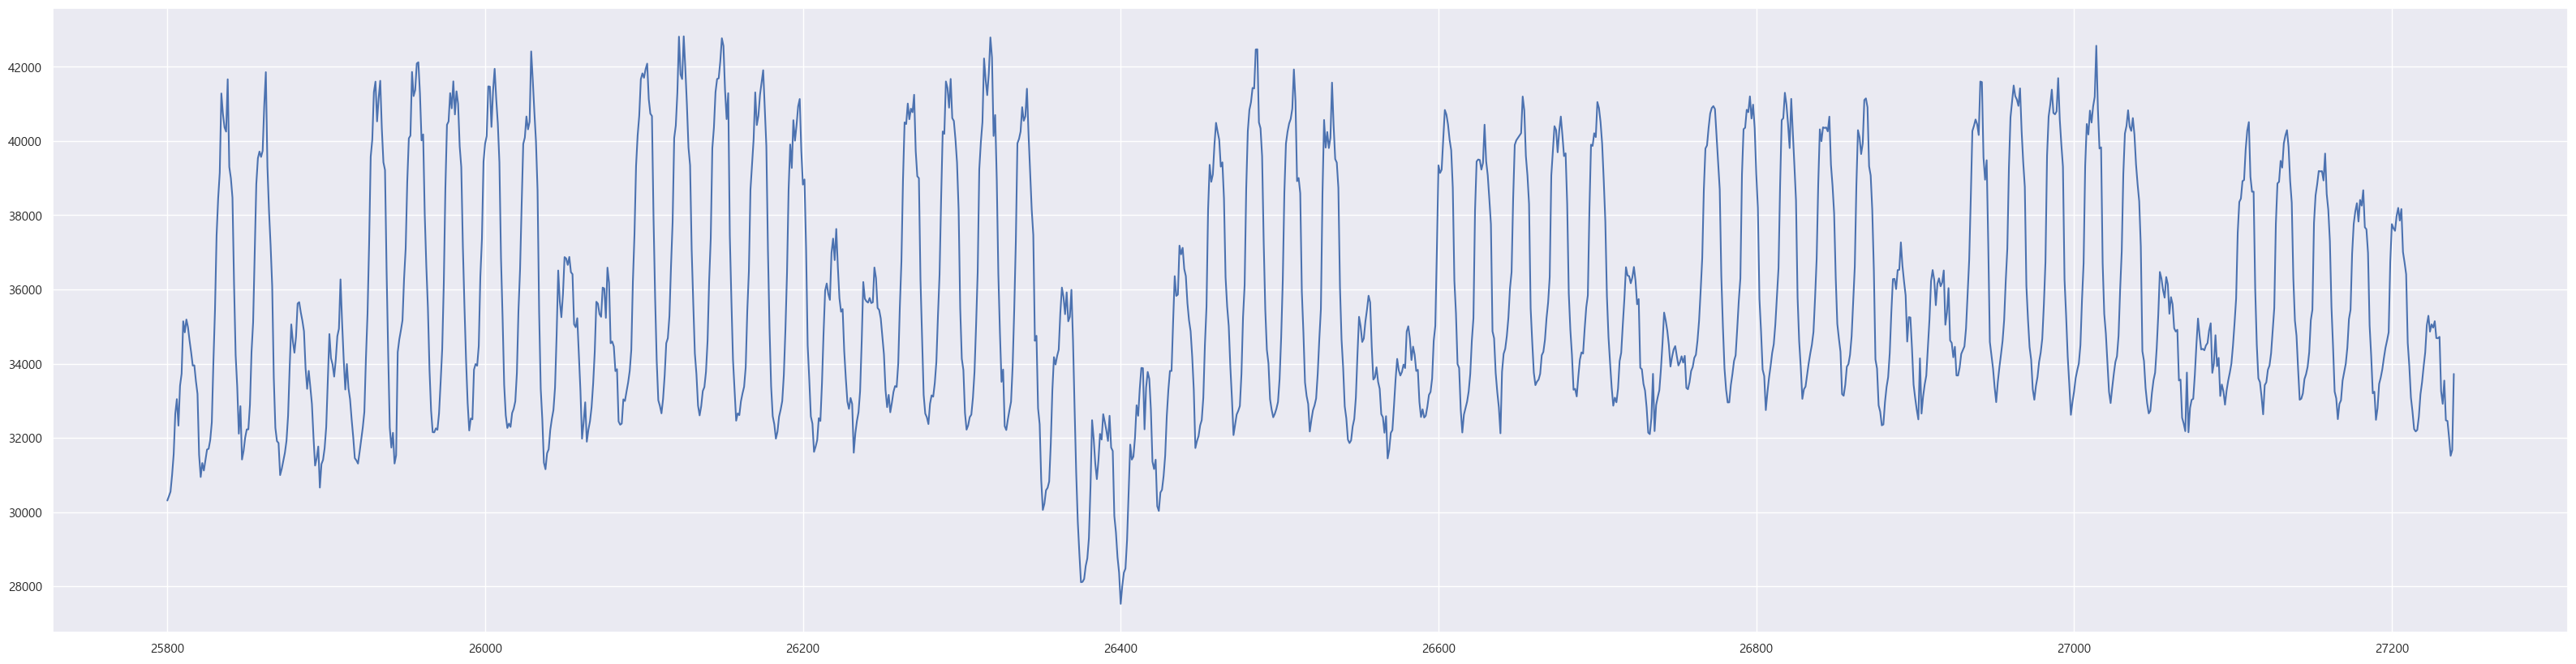

In [236]:
plt.figure(figsize=(40,10))
plt.plot(df_total[(df_total['year']==2020)& (df_total['month']>=1) & (df_total['month']<=2)]['총생활인구수'])

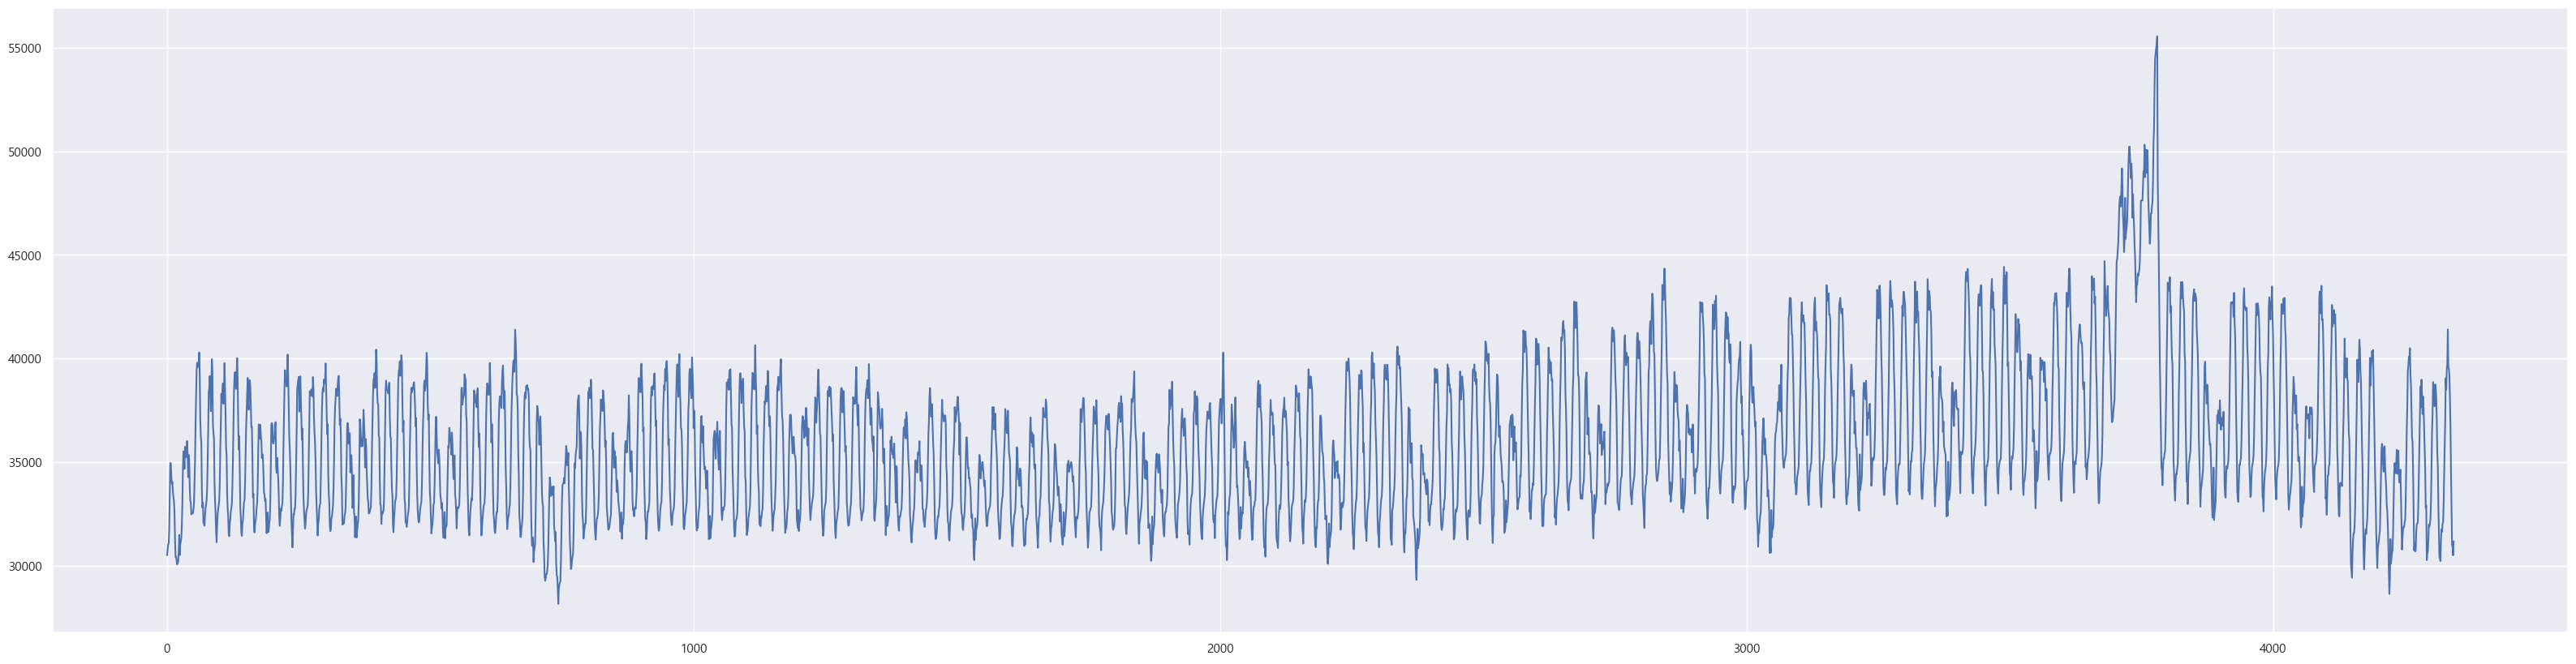

In [235]:
plt.figure(figsize=(40,10))
plt.plot(df2022['총생활인구수'])

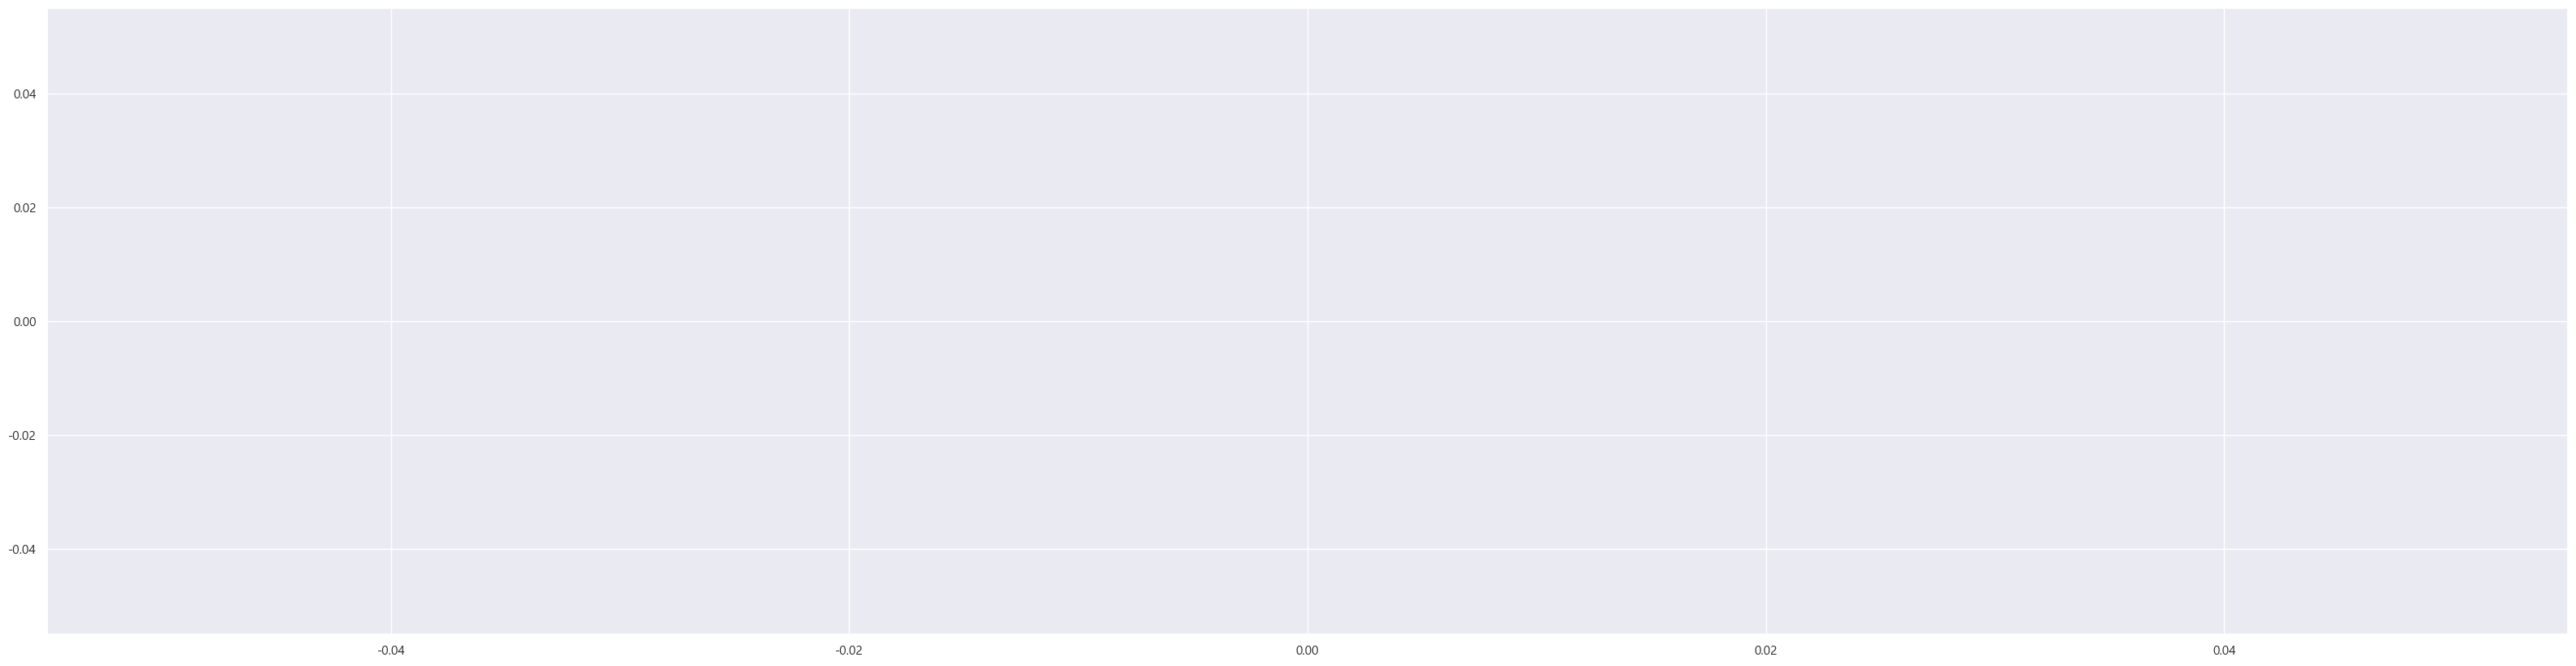

In [234]:
plt.figure(figsize=(40,10))
plt.plot(df_total[(df_total['year']==2022)]['총생활인구수'])

In [249]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [250]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LR = LR_reg.predict(test_x)

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_LR))))
print("r2 : ", r2(test_y,y_pred_LR))

LinearRegression
Mean Squared Error : 2820068.15467
Root Mean Squared Error : 1679.30586
r2 :  0.6052915338911811


In [200]:
sub = pd.read_csv("sample_submission.csv")
sub

,id,count
0,0,12345
1,1,12345
2,2,12345
3,3,12345
4,4,12345
...,...,...
1411,1411,12345
1412,1412,12345
1413,1413,12345
1414,1414,12345


In [201]:
sub['count'] = y_pred_LR

In [205]:
sub.head(20)

,id,count
0,0,31886.715365
1,1,32176.305767
2,2,32249.088430
3,3,32397.600120
4,4,33210.440251
5,5,34297.976268
6,6,35684.320026
7,7,36482.219919
8,8,36620.868119
9,9,36052.662657


In [206]:
df2022 = pd.read_csv("data_2022.csv")

In [207]:
df2022['총생활인구수'].head(20)

0     30509.7386
1     30759.5067
2     31048.8787
3     31076.1092
4     31714.9309
5     33368.3456
6     34962.7828
7     34948.9644
8     34311.2156
9     33966.9820
10    34039.4022
11    33570.1052
12    33307.6517
13    33125.8385
14    32584.0065
15    31298.8122
16    30426.6285
17    30445.2773
18    30258.8998
19    30071.1298
Name: 총생활인구수, dtype: float64

In [251]:
y_pred_LR

array([[31384.00426468],
       [31626.89152545],
       [31915.85789468],
       ...,
       [31665.60784248],
       [31746.82776238],
       [31922.19586381]])

In [252]:
y_pred_LR = y_pred_LR.flatten()

In [253]:
y_pred_LR

array([31384.00426468, 31626.89152545, 31915.85789468, ...,
       31665.60784248, 31746.82776238, 31922.19586381])